# Noah Miller GitHub Python Project 1:

## Comparing Base Python against Numba (Speed Comparison)

One of my goals for 2022 is to expand my programming and data science skills and to demonstrate these skills on my GitHub portfolio. In doing this, I intend to post one new project per week demonstrating something in programming and data science that I find interesting. This will ultimately include projects from languages including Python, R, and one I want to master over 2022, Julia. Likewise, this will primarily be focused on improving data science skills. It can, however, just be me demonstrating a particular package or new way of doing things that I find interesting. 


This particular project is showcasing something I find interesting. For those unaware, there exists a Python package called *Numba* which includes a Just-In-Time (JIT) compiler for Python. This allows certain Python functions to be compiled down to machine code, allowing them to be executed much faster than standard, interpreted Python code. For many functions, it can be a free performance boost. As I will explain later in this notebook, however, not all Python functions can be compiled to machine code using *Numba*. 


For this demonstration, I will be creating a function which approximates Euler's Number *e* using random numbers. The inspiration for this articular function comes from question A3 of the 1958 Putnam exam (full source available in bottom cell), which reads:

"A sequence of numbers αi ∈ [0, 1] is chosen at random. Show that the expected value of n, where ∑1n αi > 1, ∑1n-1 αi ≤ 1 is e."

Admittedly, for those without a background in mathematics, the premise of this question itself can be hard to grasp. In plain English, this question asks the reader to prove that if you choose a random numbers between 0 and 1 and sum them, it will take you *e* numbers on average for that summation to equal or surpass 1. Functions which are purely math lend themselves very nicely to *Numba*, as we will see.

Finally, before we get started, the comparison will work in stages. For the first round, we will use 10,000 simulations of the aforementioned function. For the second, we will use 100,000 simulations. For the third, we will use 1,000,000 simulations. Finally, for the fourth, we will use 10,000,000 simulations. Likewise, each of these simulations will be repeated 30 times so we can take an average for more confidence in our results. These results will be recorded in a list for use in visualization at the end of this project.


## Part 0: Demonstrating the Function

The purpose of this notebook is not to approximate *e* using the function, but instead to use it as a mathematical function in Python which can easily leverage the power of Numba. To demonstrate this function, however, I will run it once with 100,000,000 simulations just so we can see how close to Euler's number we really get. Note: I'm choosing not to run this part in compiled mode. Therefore, it may take a very long time to run if you decide to try this for yourself. 

Also, for fun, I'm not assigning a seed to the random number generator. Your results on this function might differ. I think this makes it more fun - let's see how close or far you get to Euler's number!

In [2]:
import numpy as np
def approx_e(simulations):
    tries = 0
    for _ in range(simulations):
        summation = 0
        while summation <= 1:
            summation += np.random.uniform(0,1)
            tries += 1
    return tries/simulations

print(approx_e(100_000_000))

2.71832511


Given that Euler's number is 2.71828... and we got 2.7183..., this approximator doesn't seem so bad. Let me know what results you get, and if you went with more simulations!

## Part 1: Base Python

To be transparent, when I say base Python, I mean the function itself will not be compiled. I will still be using NumPy for generating the random numbers. NumPy itself is written in C and Python, meaning it leverages some of the compiled features of C. 

In [3]:
# Defining our non-compiled function
import numpy as np  # Using NumPy to choose our random numbers
def approx_e(simulations):
    tries = 0
    for _ in range(simulations):  # _ is a throwaway variable; meaningless
        summation = 0
        while summation <= 1:
            summation += np.random.uniform(0,1)
            tries += 1
    return tries/simulations
        

In [4]:
from time import perf_counter  # For measuring function time performance

simulation_stages = [10_000, 100_000, 1_000_000, 10_000_000]

time_lists = [[],[],[],[]]  # These will hold the list of times the simuations take
time_averages = []

for count, value in enumerate(simulation_stages):
    for sim_stage in range(30):  # Repeating process 30 times for more confidence
        start = perf_counter()  # Our start time
        approx_e(value)
        elapsed = perf_counter() - start  
        time_lists[count].append(elapsed)
        
        
for count, value in enumerate(simulation_stages):
    print(f"Average time for stage of size {'{:,}'.format(value)} is {round(np.mean(time_lists[count]),3)} seconds")
    time_averages.append(round(np.mean(time_lists[count]),3))
        

Average time for stage of size 10,000 is 0.044 seconds
Average time for stage of size 100,000 is 0.424 seconds
Average time for stage of size 1,000,000 is 4.28 seconds
Average time for stage of size 10,000,000 is 43.706 seconds


The results above are quite interesting. The time these simulations take to run scale roughly linearly as the input size increases. Also observe the astounding 43.706 average time to run this simulation across 10 million tries.

## Part 2: Using Numba to Compile Python Functions

Observe that this function is exactly the same as the non-compiled function, except it includes the @njit decorator. This is what calls the magic of Numba. Essentially, this decorator instructs Numba to try to compile the given function into machine code. There are two options for this decorator, including @jit and @njit. Using @jit permits Numba to fall back to Python's interpreted mode in the case that Numba cannot compile a certain part of the function. This, however, means the entire function is interpreted; not just the parts that Numba could not compile. Using @njit, on the other hand, introduces an error if the function cannot be completely compiled. For those who want to ensure they're using Numba to its full capability, using @njit forces you to ensure your function can be compiled completely.  

In [5]:
from numba import njit

@njit
def approx_e_compiled(simulations):
    tries = 0
    for _ in range(simulations):
        summation = 0
        while summation <= 1:
            summation += np.random.uniform(0,1)
            tries += 1
    return tries/simulations

In [6]:
from time import perf_counter

simulation_stages = [10_000, 100_000, 1_000_000, 10_000_000]

time_lists_compiled = [[],[],[],[]]
time_averages_compiled = []

for count, value in enumerate(simulation_stages):
    for sim_stage in range(30):
        start = perf_counter()
        approx_e_compiled(value)
        elapsed = perf_counter() - start
        time_lists_compiled[count].append(elapsed)
        
        
for count, value in enumerate(simulation_stages):
    print(f"Average time for stage {'{:,}'.format(value)} is {round(np.mean(time_lists_compiled[count]),3)} seconds")
    time_averages_compiled.append(round(np.mean(time_lists_compiled[count]),3))

Average time for stage 10,000 is 0.067 seconds
Average time for stage 100,000 is 0.003 seconds
Average time for stage 1,000,000 is 0.027 seconds
Average time for stage 10,000,000 is 0.272 seconds


#### Wow. 

That was *really* fast. In the case of running this simulation 10 million times, we went from an average time of 43.706 seconds to only 0.272 seconds. This is a speedup of roughly 161 times! Let's plot this using Matplotlib so we can truly appreciate the time savings when using Numba.

#### But wait...

Why is the average time for stage 10,000 higher than the average time 100,000? Shouldn't the elapsed time be lower since it only needs to do one tength as much? In fact, our average time for simulations of size 10,000 is slower for our compiled code as opposed to our interpreted code. Why is this? Let's take a look at the list of elapsed times for our compiled function of size 10,000 below.

In [7]:
print(f"{round(max(time_lists_compiled[0]),2)} seconds.")

2.01 seconds.


Wow - our maximum time took about 2 seconds. Let's see how this compares to the maximum time for our interpreted function.

In [8]:
print(f"{round(max(time_lists[0]),2)} seconds.")

0.09 seconds.


On the other hand, the maximum run time for our interpreted was only about 1/10th of a second. So what's happenening here?

The first time a function is compiled with Numba, this compilation takes more time in addition to running the function itself. So although you can take advantage of Numba's performance, it might be better for applications where the function in question is looped several times, and thus compiled on the first pass, or cases where the function is run once, yet would take a longer time to run otherwise. 


## Part 3: Visualizing the Time Differences

Sometimes the numbers make it hard to appreciate how massive the speedups are. Let's create a graph so appreciate the differences visually.

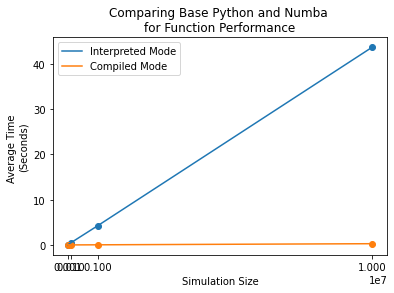

In [9]:
import matplotlib.pyplot as plt

plt.plot(simulation_stages, time_averages)
plt.scatter(simulation_stages, time_averages)
plt.plot(simulation_stages, time_averages_compiled)
plt.scatter(simulation_stages, time_averages_compiled)
plt.title("Comparing Base Python and Numba \nfor Function Performance")
plt.xlabel("Simulation Size")
plt.xticks(simulation_stages)
plt.ylabel("Average Time \n(Seconds)")
plt.legend(['Interpreted Mode','Compiled Mode'])
plt.show()

This goes to show how fast Numba is. By comparison, its average times just look like a flat line in reference to the interpreted function. Instead, let's try taking the log of these situations to see if that helps at all. 

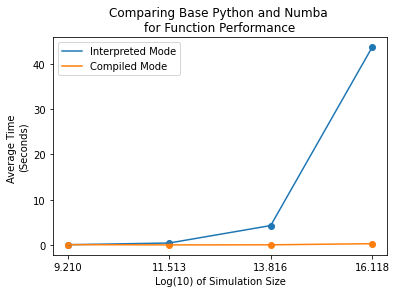

In [10]:
plt.plot(np.log(simulation_stages), time_averages)
plt.scatter(np.log(simulation_stages), time_averages)
plt.plot(np.log(simulation_stages), time_averages_compiled)
plt.scatter(np.log(simulation_stages), time_averages_compiled)
plt.title("Comparing Base Python and Numba \nfor Function Performance")
plt.xlabel("Log(10) of Simulation Size")
plt.xticks(np.log(simulation_stages))
plt.ylabel("Average Time \n(Seconds)")
plt.legend(['Interpreted Mode','Compiled Mode'])
plt.show()

Even in this case, the orange line (compiled mode) is still flat in comparison to the blue line (interpreted mode). It is, however, easier to see how these situations compare. We can easily see how the chart for Interpreted Mode scales linearly as our input size increases by a factor of 10. If we repeated this experiment with higher input sizes for our compiled function, we would eventually see this pattern take off.


This was an incredibly simplistic example of what someone can do by leveraging Numba. As part of my 2022 programming journey, I hope to come back to Numba for at least three projects, which I consider beginner, intermediate, and advanced. They include:

- Instances where Numba cannot accelerate a Function (Beginner)
- Using Numba for Machine Learning Engineering (Medium)
- Creating a Time Series Framework from scratch using Numba (Advanced)

Overall, I hope I've demonstrated to you the basics of how Numba can accelerate functions. For some mathematical and scientific functions, Numba can easily accelerate a function's performance by over 100 times. As I'll explore in the future, however, Numba is not (yet) the magical library that will accelerate Python code into C-like levels. For those who want a language which performs like C yet has an easy syntax like Python, I would highly recommend learning the Julia language. Notebooks containing Julia projects will come to my portfolio in the future, so please stay tuned for those!

# Project Information

Source for 1958 Putnam Question A3:
https://prase.cz/kalva/putnam/psoln/psol583.html

System Information:
2020 M1 MacBook Pro, 16 GB Unified Memory